# Data Exploration

This notebook explores the [academia.stackexchange.com](https://academia.stackexchange.com/) data dump.

## Table of Contents
* [Users](#users)
* [Tags](#tags)
* [Posts](#posts)
* [Questions](#questions)
* [Comments](#comments)
* [Votes](#votes)

In [5]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from academia_tag_recommender.prints import print_stats, print_frequency_stats_in_ranges

<a id="users"></a>

## Users

The data dump includes a file documenting all registered users.

To explore the users we import them from the `data` module:

In [6]:
from academia_tag_recommender.data import users as get_users
users = get_users()

Importing the users file reveals the size of the users dataset.

In [7]:
print('There are {0} users in the data set.'.format(len(users)))

There are 100321 users in the data set.


**Example:**

To understand which information is given for a specific user we explore the attributes of an example user.

In [8]:
print(users[0].attrib)

{'Id': '-1', 'Reputation': '1', 'CreationDate': '2012-02-14T18:31:38.453', 'DisplayName': 'Community', 'LastAccessDate': '2012-02-14T18:31:38.453', 'WebsiteUrl': 'http://meta.stackexchange.com/', 'Location': 'on the server farm', 'AboutMe': '<p>Hi, I\'m not really a person.</p>\n\n<p>I\'m a background process that helps keep this site clean!</p>\n\n<p>I do things like</p>\n\n<ul>\n<li>Randomly poke old unanswered questions every hour so they get some attention</li>\n<li>Own community questions and answers so nobody gets unnecessary reputation from them</li>\n<li>Own downvotes on spam/evil posts that get permanently deleted</li>\n<li>Own suggested edits from anonymous users</li>\n<li><a href="http://meta.stackexchange.com/a/92006">Remove abandoned questions</a></li>\n</ul>\n', 'Views': '0', 'UpVotes': '20388', 'DownVotes': '15368', 'AccountId': '-1'}


Which results in having the following attribute keys for users:

In [9]:
print(users[0].keys())

['Id', 'Reputation', 'CreationDate', 'DisplayName', 'LastAccessDate', 'WebsiteUrl', 'Location', 'AboutMe', 'Views', 'UpVotes', 'DownVotes', 'AccountId']


<a id="tags"></a>

## Tags

The data dump includes a file documenting all tags.

To explore the tags we import them from the `data` module:

In [10]:
from academia_tag_recommender.data import tags as get_tags
tags = get_tags()

Importing the tags file reveals the size of the tags dataset.

In [11]:
print('There are {0} tags in the dataset.'.format(len(tags)))

There are 452 tags in the dataset.


**Example:**

To understand which information is given for a specific tag we explore the attributes of an example tag.

In [12]:
print(tags[0].attrib)

{'Id': '2', 'TagName': 'visa', 'Count': '86', 'ExcerptPostId': '7686', 'WikiPostId': '7685'}


Which results in having the following attribute keys for tags:

In [13]:
print(tags[0].keys())

['Id', 'TagName', 'Count', 'ExcerptPostId', 'WikiPostId']


**Analysis:**
    
To get a better understanding for the tag data set we investigate the tag distribution by asking:

***How often is each tag used?***

To discuss this questions we first sort the tags based on their occurence (`Count`).

In [14]:
sorted_tags = sorted(tags, key=lambda x: int(x.attrib['Count']), reverse=True)

We then plot the occurence (`Count`) for each tag.

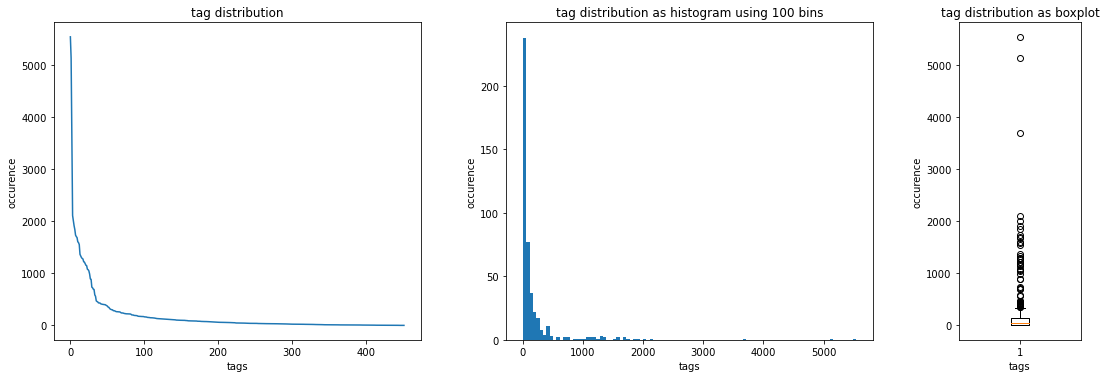

In [15]:
x = range(0, len(sorted_tags))
y = list(map(lambda x: int(x.attrib['Count']), sorted_tags))

fig, axes = plt.subplots(1, 3, figsize=(15,5), gridspec_kw={'width_ratios': [3, 3, 1]})
fig.tight_layout()
plt.subplots_adjust(wspace=0.3)

axes[0].plot(x, y)
axes[0].set_title('tag distribution')
axes[0].set_xlabel('tags')
axes[0].set_ylabel('occurence')

bin_amount = 100
axes[1].hist(y, bins=bin_amount)
axes[1].set_title('tag distribution as histogram using {} bins'.format(bin_amount))
axes[1].set_xlabel('tags')
axes[1].set_ylabel('occurence')

tag_counts = list(map(lambda x: int(x.attrib['Count']), sorted_tags))
axes[2].boxplot(tag_counts)
axes[2].set_title('tag distribution as boxplot')
axes[2].set_xlabel('tags')
axes[2].set_ylabel('occurence')

plt.show()

Plotting the occurence for each tag reveals that a small amount of tags gets used quite often, while most of the tags are used less than 50 times.

To get an overview over the most used tags we print the 10 most used tags with their count.

In [16]:
print('{:<20} {:<15}'.format('Tag name', 'Count'))
for tag in sorted_tags[0:11]:
    print('{:<20} {:<15}'.format(tag.attrib['TagName'], tag.attrib['Count']))

Tag name             Count          
publications         5548           
phd                  5139           
graduate-admissions  3696           
research-process     2113           
graduate-school      2017           
citations            1917           
thesis               1845           
peer-review          1736           
mathematics          1708           
journals             1689           
masters              1609           


We can see that in the data set, there are **2 tags** that are used **more than 5000 times** (`publication`, `phd`), **one** that is used **~3700 times** (`graduate-admissions`), while all **other tags** are used **less than 2000 times**.

For further investigation we remove the three outliers and plot another boxplot.

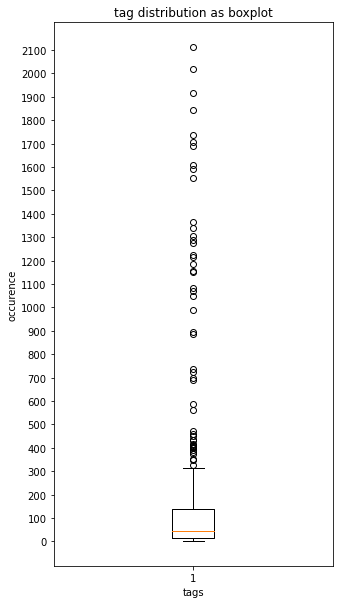

In [17]:
fig, axes = plt.subplots(figsize=(5,10))

tag_counts = list(map(lambda x: int(x.attrib['Count']), sorted_tags))
outlier_amount = 3
axes.boxplot(tag_counts[outlier_amount: len(tag_counts)])
axes.set_title('tag distribution as boxplot')
axes.set_xlabel('tags')
axes.set_ylabel('occurence')
y_ticks = np.arange(0, tag_counts[outlier_amount], 100)
axes.yaxis.set_ticks(y_ticks)

plt.show()

We now see that the middle 50% of the tags rougly occure between 0 and 150 times.

To examine in detail we print the exact statistics.

In [18]:
print_stats(tag_counts)

Max:                5548                
Third Quartile:     144.25              
Mean:               196.40265486725664  
Median:             46.5                
First Quartile:     15.75               
Min:                1                   
Standard deviation: 507.9936082379884   
Variance:           258057.5060106508   


Now we have the exact values and know that the middle **50%** of the tags occure between **15.75 and 144.25** times.

The **average** occurence of a tag is **196.4** times while the **median** occurence lays at **46.5**, showing the big impact of the outliers.

We now examine the tag data set in even more detail by checking the number of tags in specified frequency ranges.

In [22]:
print_frequency_stats_in_ranges(sorted_tags, [(0, 10), (10, 100), (100, 1000), (1000, tag_counts[0]), (0, tag_counts[0])])

Usage frequency range    Number of tags in the range   Number of tags in the range [%]    Cumulative total usage   Cumulative total usage [%]    
(0, 10]                  89                            19.69                              486                      0.55                          
(10, 100]                217                           48.01                              9544                     10.75                         
(100, 1000]              120                           26.55                              30879                    34.78                         
(1000, 5548]             26                            5.75                               47865                    53.92                         
(0, 5548]                452                           100.00                             88774                    100.00                        


Having the distribution graphs in mind we change the ranges to better match the data.

In [23]:
print_frequency_stats_in_ranges(sorted_tags, [(0, 600), (600, 1000), (1000, 2000), (2000, tag_counts[0]), (0, tag_counts[0])])

Usage frequency range    Number of tags in the range   Number of tags in the range [%]    Cumulative total usage   Cumulative total usage [%]    
(0, 600]                 419                           92.70                              35292                    39.75                         
(600, 1000]              7                             1.55                               5617                     6.33                          
(1000, 2000]             21                            4.65                               29352                    33.06                         
(2000, 5548]             5                             1.11                               18513                    20.85                         
(0, 5548]                452                           100.00                             88774                    100.00                        


We can now see that **92.7 %** of the tags are each used less than **600 times**.

While the remaining **32 tags** are used in **60.24 %** cases of all tag occurances.

<a id="posts"></a>

## Posts

The data dump includes a file documenting all posts.

To explore the posts we import them from the `data` module:

In [24]:
from academia_tag_recommender.data import posts as get_posts
posts = get_posts()

Importing the posts file reveals the size of the posts dataset.

In [25]:
print('There are {0} posts in the data set.'.format(len(posts)))

There are 112154 posts in the data set.


**Example:**

To understand which information is given for a specific post we explore the attributes of an example post.

In [26]:
print(posts[0].attrib)

{'Id': '1', 'PostTypeId': '1', 'AcceptedAnswerId': '180', 'CreationDate': '2012-02-14T20:23:40.127', 'Score': '20', 'ViewCount': '532', 'Body': '<p>As from title. What kind of visa class do I have to apply for, in order to work as an academic in Japan ? </p>\n', 'OwnerUserId': '5', 'LastEditorUserId': '2700', 'LastEditDate': '2013-10-30T09:14:11.633', 'LastActivityDate': '2020-01-06T22:44:41.020', 'Title': 'What kind of Visa is required to work in Academia in Japan?', 'Tags': '<job-search><visa><japan>', 'AnswerCount': '2', 'CommentCount': '1', 'FavoriteCount': '1', 'ContentLicense': 'CC BY-SA 3.0'}


Which results in having the following attribute keys for posts:

In [27]:
print(posts[0].keys())

['Id', 'PostTypeId', 'AcceptedAnswerId', 'CreationDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId', 'LastEditorUserId', 'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount', 'CommentCount', 'FavoriteCount', 'ContentLicense']


<a id="questions"></a>

## Questions

[Posts](#posts) with `PostTypeId == 1` are questions.

To explore the questions we import them from the `data` module:

In [28]:
from academia_tag_recommender.data import questions as get_questions
questions = get_questions()

Importing the posts file reveals the size of the posts dataset.

In [29]:
print('There are {0} questions in the data set.'.format(len(questions)))

There are 33082 questions in the data set.


**Example:**

Since questions are posts with `PostTypeId == 1` the example object does look the same as a posts object.

In [30]:
print(questions[0].attrib)

{'Id': '1', 'PostTypeId': '1', 'AcceptedAnswerId': '180', 'CreationDate': '2012-02-14T20:23:40.127', 'Score': '20', 'ViewCount': '532', 'Body': '<p>As from title. What kind of visa class do I have to apply for, in order to work as an academic in Japan ? </p>\n', 'OwnerUserId': '5', 'LastEditorUserId': '2700', 'LastEditDate': '2013-10-30T09:14:11.633', 'LastActivityDate': '2020-01-06T22:44:41.020', 'Title': 'What kind of Visa is required to work in Academia in Japan?', 'Tags': '<job-search><visa><japan>', 'AnswerCount': '2', 'CommentCount': '1', 'FavoriteCount': '1', 'ContentLicense': 'CC BY-SA 3.0'}


With the same keys as a posts object.

In [31]:
print(questions[0].keys())

['Id', 'PostTypeId', 'AcceptedAnswerId', 'CreationDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId', 'LastEditorUserId', 'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount', 'CommentCount', 'FavoriteCount', 'ContentLicense']


For each question the tags are stored using diamon notation **<** *tag* **>**.

In [32]:
print(questions[0].attrib['Tags'])

<job-search><visa><japan>


For further investigation we replace this list to contain strings instead of the diamond notation.

In [33]:
for question in questions:
    if type(question.attrib['Tags']) != list:
        tags_ = question.attrib['Tags'].replace('<', '').split('>')
        question.attrib['Tags'] = tags_[0:(len(tags_)-1)]
print(questions[0].attrib['Tags'])

['job-search', 'visa', 'japan']


**Analysis:**
    
To get a better understanding about the tag usage in questions we investigate the followibng issues:

* [How many tags are used for each question?](#tag_amount_distribution)
* [How often does a tag appear with other tags?](#tag_cooccurence)


* [Which impact has the number of tags to the `ViewCount`?](#tags_vs_view_count)
* [Which impact has the number of tags to the `Score`?](#tags_vs_score)
* [Which impact has the number of tags to the `AnswerCount`?](#tags_vs_answer_count)
* [Which impact has the number of tags to the `CommentCount`?](#tags_vs_comment_count)
* [Which impact has the number of tags on whether a question receives an `AcceptedAnswer`?](#tags_vs_accepted_answer)


* [How many characters has the title of a question?](#title_chars)
* [How many characters has the text of a question?](#text_chars)

For first investigations we prepare a list containing the number of tags for each question.

In [34]:
num_of_tags_per_question = [len(question.attrib['Tags']) for question in questions]

A question is allowed to have maximum 5 tags per question. ([*What are tags, and how should I use them?*](https://academia.stackexchange.com/help/tagging))

In [35]:
num_of_tags = [1, 2, 3, 4, 5]

***How many tags are used for each question?*** <a id="tag_amount_distribution"/>

We investigate how many questions are tagged with how many tags in the data set.

In [36]:
def questions_with_num_of_tags(num_of_tags):
    return len([1 for num_of_tags_ in num_of_tags_per_question if num_of_tags_ == num_of_tags])

In [37]:
num_of_questions_with_num_of_tags = [questions_with_num_of_tags(num_of_tags_) for num_of_tags_ in num_of_tags]

In [38]:
print('{:<15}{:<20}{}'.format('Number of Tags', 'Number of Questions', 'Percentage'))
for index, num_of_tags_ in enumerate(num_of_tags):
    percentage = num_of_questions_with_num_of_tags[index] / len(questions) * 100
    print('{:<15}{:<20}{:2.2f} %'.format(num_of_tags_, num_of_questions_with_num_of_tags[index], percentage))

Number of Tags Number of Questions Percentage
1              5541                16.75 %
2              10022               30.29 %
3              9608                29.04 %
4              5190                15.69 %
5              2721                8.23 %


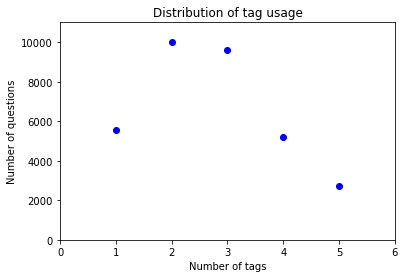

In [39]:
fig, axes = plt.subplots()

axes.plot([1, 2, 3, 4, 5], num_of_questions_with_num_of_tags, 'bo')
axes.axis([0, 6, 0, 11000])
axes.set_title('Distribution of tag usage')
axes.set_xlabel('Number of tags')
axes.set_ylabel('Number of questions')

plt.show()

We see that the majority of questions has **2 or 3 tags**, while the least questions have **5 tags**.

***Which impact has the number of tags to the `ViewCount`?*** <a id="tags_vs_view_count"/>

We investigate whether the number of tags for a question has an impact on the times the question was viewed.

In [40]:
def specific_questions_with_num_of_tags(key, num_of_tags):
    return [int(question.attrib[key]) for question in questions if len(question.attrib['Tags']) == num_of_tags]

In [41]:
view_counts_with_num_of_tags = [specific_questions_with_num_of_tags('ViewCount', num_of_tags_) for num_of_tags_ in num_of_tags]
average_view_count_with_num_of_tags = [np.average(view_counts) for view_counts in view_counts_with_num_of_tags]

In [42]:
print('{:<15}{}'.format('Number of Tags', 'Average View Count'))
for index, num_of_tags_ in enumerate(num_of_tags):
    print('{:<15}{:2.2f}'.format(num_of_tags_, average_view_count_with_num_of_tags[index]))

Number of Tags Average View Count
1              2410.16
2              2908.53
3              3075.22
4              2917.57
5              2514.85


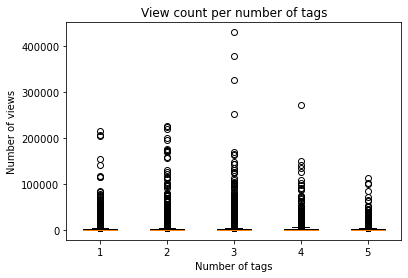

In [43]:
fig, axes = plt.subplots()

axes.boxplot(view_counts_with_num_of_tags)
axes.set_title('View count per number of tags')
axes.set_xlabel('Number of tags')
axes.set_ylabel('Number of views')

plt.show()

When looking at the *average* view count and the boxplot we assume that questions with **3 tags** get viewed slightly more often than other questions.

In [44]:
for index, view_counts in enumerate(view_counts_with_num_of_tags):
    print('\nNumber of tags: {}'.format(index+1))
    print_stats(view_counts)


Number of tags: 1
Max:                215502              
Third Quartile:     1435.0              
Mean:               2410.157733261144   
Median:             357.0               
First Quartile:     151.0               
Min:                4                   
Standard deviation: 8552.580915080252   
Variance:           73146640.30899496   

Number of tags: 2
Max:                226621              
Third Quartile:     2059.75             
Mean:               2908.528337657154   
Median:             491.5               
First Quartile:     190.0               
Min:                13                  
Standard deviation: 9741.265877562884   
Variance:           94892260.897371     

Number of tags: 3
Max:                430435              
Third Quartile:     2019.25             
Mean:               3075.221690258118   
Median:             548.0               
First Quartile:     208.75              
Min:                16                  
Standard deviation: 11181.78685567663   


If we look at the *median* on the other hand, we see that questions with **4 tags** get the most views, followed by questions with **3 or 5 tags**.

***Which impact has the number of tags to the `Score`?*** <a id="tags_vs_score"/>

We investigate whether the number of tags for a question has an impact on the score the question receives.

In [45]:
scores_with_num_of_tags = [specific_questions_with_num_of_tags('Score', num_of_tags_) for num_of_tags_ in num_of_tags]
average_score_with_num_of_tags = [np.average(scores) for scores in scores_with_num_of_tags]

In [46]:
print('{:<15}{}'.format('Number of Tags', 'Average Score'))
for index, num_of_tags_ in enumerate(num_of_tags):
    print('{:<15}{:2.2f}'.format(num_of_tags_, average_score_with_num_of_tags[index]))

Number of Tags Average Score
1              7.19
2              8.93
3              9.53
4              10.29
5              9.55


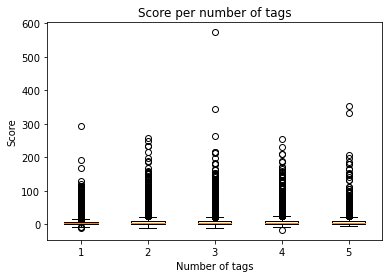

In [47]:
fig, axes = plt.subplots()

axes.boxplot(scores_with_num_of_tags)
axes.set_title('Score per number of tags')
axes.set_xlabel('Number of tags')
axes.set_ylabel('Score')

plt.show()

In [48]:
for index, scores in enumerate(scores_with_num_of_tags):
    print('\nNumber of tags: {}'.format(index+1))
    print_stats(scores)


Number of tags: 1
Max:                292                 
Third Quartile:     7.0                 
Mean:               7.189676953618481   
Median:             3.0                 
First Quartile:     1.0                 
Min:                -10                 
Standard deviation: 13.988287889261693  
Variance:           195.67219807286534  

Number of tags: 2
Max:                257                 
Third Quartile:     10.0                
Mean:               8.934643783675913   
Median:             4.0                 
First Quartile:     1.0                 
Min:                -10                 
Standard deviation: 15.57948120611201   
Variance:           242.72023465159734  

Number of tags: 3
Max:                573                 
Third Quartile:     10.0                
Mean:               9.5261240632806     
Median:             4.0                 
First Quartile:     2.0                 
Min:                -10                 
Standard deviation: 17.64940812865554   


When looking at the *median* we notice that only questions with 1 tag get a lower score, while questions with 2 or more tags get the same *median* score.

If we use the *mean* as our reference we figure that **4 tag** result in the highest score, followed by **3 and 5 tags** per question.

***Which impact has the number of tags to the `AnswerCount`?*** <a id="tags_vs_answer_count"/>

We investigate whether the number of tags for a question has an impact on number of answers the question receives.

In [49]:
answer_counts_with_num_of_tags = [specific_questions_with_num_of_tags('AnswerCount', num_of_tags_) for num_of_tags_ in num_of_tags]
average_answer_count_with_num_of_tags = [np.average(answer_counts) for answer_counts in answer_counts_with_num_of_tags]

In [50]:
print('{:<15}{}'.format('Number of Tags', 'Average Number of Answers'))
for index, num_of_tags_ in enumerate(num_of_tags):
    print('{:<15}{:2.2f}'.format(num_of_tags_, average_answer_count_with_num_of_tags[index]))

Number of Tags Average Number of Answers
1              2.18
2              2.34
3              2.42
4              2.46
5              2.39


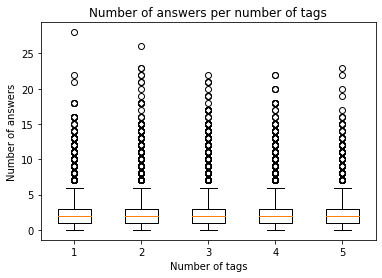

In [51]:
fig, axes = plt.subplots()

axes.boxplot(answer_counts_with_num_of_tags)
axes.set_title('Number of answers per number of tags')
axes.set_xlabel('Number of tags')
axes.set_ylabel('Number of answers')

plt.show()

In [52]:
for index, answer_counts in enumerate(answer_counts_with_num_of_tags):
    print('\nNumber of tags: {}'.format(index+1))
    print_stats(answer_counts)


Number of tags: 1
Max:                28                  
Third Quartile:     3.0                 
Mean:               2.177585273416351   
Median:             2.0                 
First Quartile:     1.0                 
Min:                0                   
Standard deviation: 2.1270448547893683  
Variance:           4.524319814285924   

Number of tags: 2
Max:                26                  
Third Quartile:     3.0                 
Mean:               2.341249251646378   
Median:             2.0                 
First Quartile:     1.0                 
Min:                0                   
Standard deviation: 2.190191655782892   
Variance:           4.796939489061005   

Number of tags: 3
Max:                22                  
Third Quartile:     3.0                 
Mean:               2.4190258118234804  
Median:             2.0                 
First Quartile:     1.0                 
Min:                0                   
Standard deviation: 2.2851246256395457  


We see that the number of answers does not change significantly with the number of tags.

***Which impact has the number of tags to the `CommentCount`?*** <a id="tags_vs_comment_count"/>

We investigate whether the number of tags for a question has an impact on number of comments the question receives.

In [53]:
comment_counts_with_num_of_tags = [specific_questions_with_num_of_tags('CommentCount', num_of_tags_) for num_of_tags_ in num_of_tags]
average_comment_count_with_num_of_tags = [np.average(comment_counts) for comment_counts in comment_counts_with_num_of_tags]

In [54]:
print('{:<15}{}'.format('Number of Tags', 'Average Number of Comments'))
for index, num_of_tags_ in enumerate(num_of_tags):
    print('{:<15}{:2.2f}'.format(num_of_tags_, average_comment_count_with_num_of_tags[index]))

Number of Tags Average Number of Comments
1              3.73
2              3.85
3              4.12
4              4.26
5              4.35


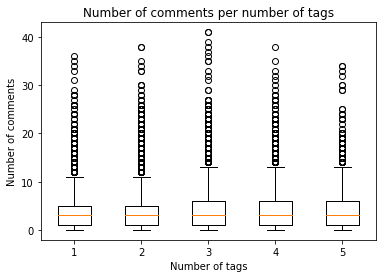

In [55]:
fig, axes = plt.subplots()

axes.boxplot(comment_counts_with_num_of_tags)
axes.set_title('Number of comments per number of tags')
axes.set_xlabel('Number of tags')
axes.set_ylabel('Number of comments')

plt.show()

In [56]:
for index, comment_counts in enumerate(comment_counts_with_num_of_tags):
    print('\nNumber of tags: {}'.format(index+1))
    print_stats(comment_counts)


Number of tags: 1
Max:                36                  
Third Quartile:     5.0                 
Mean:               3.733983035553149   
Median:             3.0                 
First Quartile:     1.0                 
Min:                0                   
Standard deviation: 3.93618769136739    
Variance:           15.493573541672143  

Number of tags: 2
Max:                38                  
Third Quartile:     5.0                 
Mean:               3.854420275394133   
Median:             3.0                 
First Quartile:     1.0                 
Min:                0                   
Standard deviation: 4.037251693350562   
Variance:           16.299401235461985  

Number of tags: 3
Max:                41                  
Third Quartile:     6.0                 
Mean:               4.120316402997502   
Median:             3.0                 
First Quartile:     1.0                 
Min:                0                   
Standard deviation: 4.30874102170757    


The *median* is the same for each number of tags.

If we look at the *mean* we notice a slight increase in the number of comments based on the number of tags.

***Which impact has the number of tags on whether a question receives an `AcceptedAnswer`?*** <a id="tags_vs_accepted_answer"/>

We investigate whether the number of tags for a question has an impact on the question receiving an accepted answer.

In [57]:
questions_with_answers = [question for question in questions if 'AcceptedAnswerId' in question.keys()]
questions_without_answers = [question for question in questions if 'AcceptedAnswerId' not in question.keys()]

We first examine how many questions have an accepted answer regardless of their number of tags.

In [58]:
print('{:<40}{:<10}{:.4} %'.format('Questions with accepted answers:', len(questions_with_answers), len(questions_with_answers) / len(questions) * 100))
print('{:<40}{:<10}{:.4} %'.format('Questions without accepted answers:', len(questions_without_answers), len(questions_without_answers) / len(questions) * 100))

Questions with accepted answers:        14412     43.56 %
Questions without accepted answers:     18670     56.44 %


In general there are slightly more questions without accepted answers than questions with accepted answers.

In [59]:
def split_by_num_of_tags(data):
    return [len([question for question in data if len(question.attrib['Tags']) == num_of_tags_]) for num_of_tags_ in num_of_tags] 

In [60]:
answered_questions_by_num_of_tags = split_by_num_of_tags(questions_with_answers)
unanswered_questions_by_num_of_tags = split_by_num_of_tags(questions_without_answers)

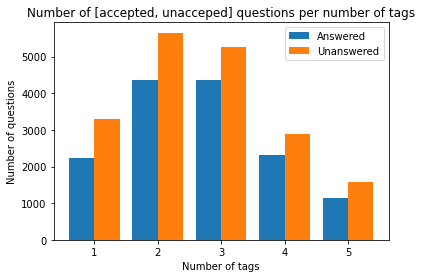

In [61]:
fig, axes = plt.subplots()

bar_width = 0.4
axes.bar(num_of_tags, answered_questions_by_num_of_tags, width=bar_width, label='Answered')
axes.bar([x + bar_width for x in num_of_tags], unanswered_questions_by_num_of_tags, width=bar_width, label='Unanswered')
axes.set_xticks([x + bar_width / 2 for x in num_of_tags])
axes.set_xticklabels(num_of_tags)
axes.set_title('Number of [accepted, unacceped] questions per number of tags')
axes.set_xlabel('Number of tags')
axes.set_ylabel('Number of questions')
axes.legend()

plt.show()

We see that for each number of tags there are more unanswered question than those with an accepted answer.

In [62]:
percentages_answered_questions_by_num_of_tags = [(answered_questions_by_num_of_tags[index] / num_of_questions_with_num_of_tags[index]) for index, _ in enumerate(num_of_tags)]
percentages_unanswered_questions_by_num_of_tags = [(unanswered_questions_by_num_of_tags[index] / num_of_questions_with_num_of_tags[index]) for index, _ in enumerate(num_of_tags)]

In [63]:
print('{:<15}{:<15}{:<15}'.format('Number of Tags', 'Answered [%]', 'Unanswered [%]'))
for index, num_of_tags_ in enumerate(num_of_tags):
    print('{:<15}{:<15.2f}{:<15.2f}'.format(num_of_tags_, percentages_answered_questions_by_num_of_tags[index], percentages_unanswered_questions_by_num_of_tags[index]))

Number of Tags Answered [%]   Unanswered [%] 
1              0.40           0.60           
2              0.44           0.56           
3              0.45           0.55           
4              0.44           0.56           
5              0.42           0.58           


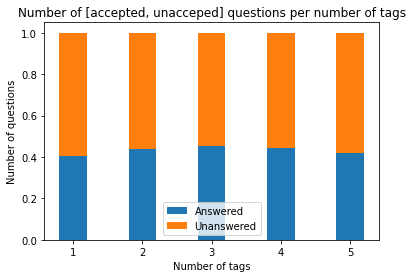

In [64]:
fig, axes = plt.subplots()

axes.bar(num_of_tags, percentages_answered_questions_by_num_of_tags, width=bar_width, label='Answered')
axes.bar(num_of_tags, percentages_unanswered_questions_by_num_of_tags, bottom=percentages_answered_questions_by_num_of_tags, width=bar_width, label='Unanswered')
axes.set_title('Number of [accepted, unacceped] questions per number of tags')
axes.set_xlabel('Number of tags')
axes.set_ylabel('Number of questions')
axes.legend()

plt.show()

We see that the number of tags does not have a significant impact on whether the question has an accepted answer or not.

There is are slightly more questions with accepted answers if the number of tags equals 3.

***How many characters has the title of a question?*** <a id="title_chars"/>

We investigate how many characters the title of a question has.

In [65]:
title_length_per_question = sorted([len(question.attrib['Title']) for question in questions], reverse=True)

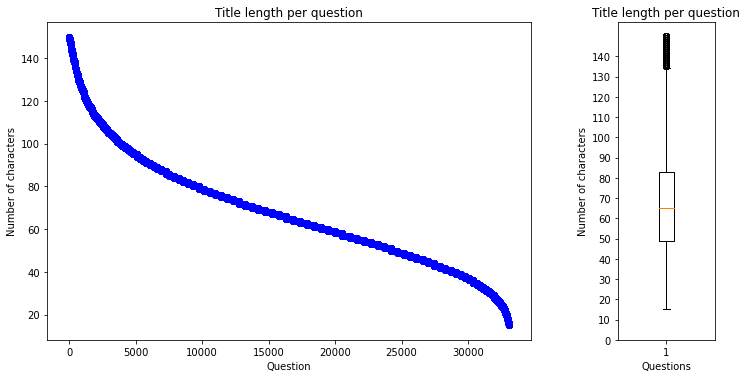

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(10,5), gridspec_kw={'width_ratios': [5, 1]})
fig.tight_layout()
plt.subplots_adjust(wspace=0.3)

x = range(0, len(title_length_per_question))
y = title_length_per_question
axes[0].plot(x, y, 'bo')
axes[0].set_title('Title length per question')
axes[0].set_xlabel('Question')
axes[0].set_ylabel('Number of characters')

axes[1].boxplot(title_length_per_question)
axes[1].set_yticks(np.arange(0, title_length_per_question[0], 10))
axes[1].set_title('Title length per question')
axes[1].set_xlabel('Questions')
axes[1].set_ylabel('Number of characters')

plt.show()

In [67]:
print_stats(title_length_per_question)

Max:                150                 
Third Quartile:     83.0                
Mean:               68.01481168006771   
Median:             65.0                
First Quartile:     49.0                
Min:                15                  
Standard deviation: 25.582454250678982  
Variance:           654.4619654880831   


We see that title have 15 to 150 characters, while the *mean* ist at **~68** and the *median* at **65** characters.

***How many characters has the text of a question?*** <a id="text_chars"/>

We investigate how many characters the text (`Body`) of a question has.

In [68]:
text_length_per_question = sorted([len(question.attrib['Body']) for question in questions], reverse=True)

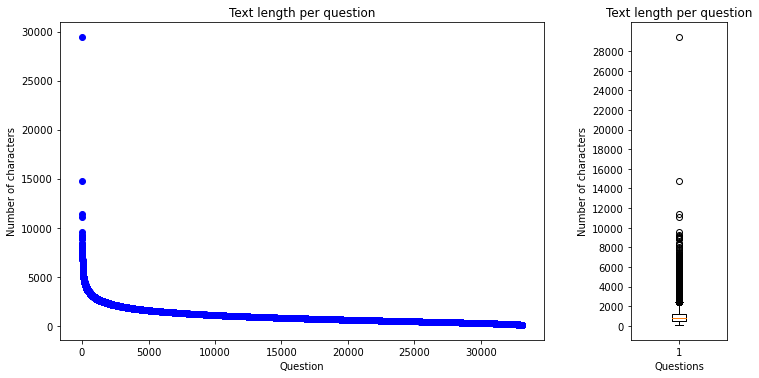

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(10,5), gridspec_kw={'width_ratios': [5, 1]})
fig.tight_layout()
plt.subplots_adjust(wspace=0.3)

x = range(0, len(text_length_per_question))
y = text_length_per_question
axes[0].plot(x, y, 'bo')
axes[0].set_title('Text length per question')
axes[0].set_xlabel('Question')
axes[0].set_ylabel('Number of characters')

axes[1].boxplot(text_length_per_question)
axes[1].set_yticks(np.arange(0, text_length_per_question[0], 2000))
axes[1].set_title('Text length per question')
axes[1].set_xlabel('Questions')
axes[1].set_ylabel('Number of characters')

plt.show()

We notice, that there are a few outliers that have much more characters than the other questions.

To investigate further we print the text length of the 5 longest questions.

In [70]:
outlier_amount = 5
print('Lengths of the {} longest texts:'.format(outlier_amount))
for text_length in text_length_per_question[0:outlier_amount]:
    print(text_length)

Lengths of the 5 longest texts:
29464
14747
11376
11097
9598


Since the outliers make it difficult to understand the data set, we repeat the analysis of the text length for texts with length < 10000.

In [71]:
text_length_per_question_sm_thousand = [text_length for text_length in text_length_per_question if text_length < 10000]

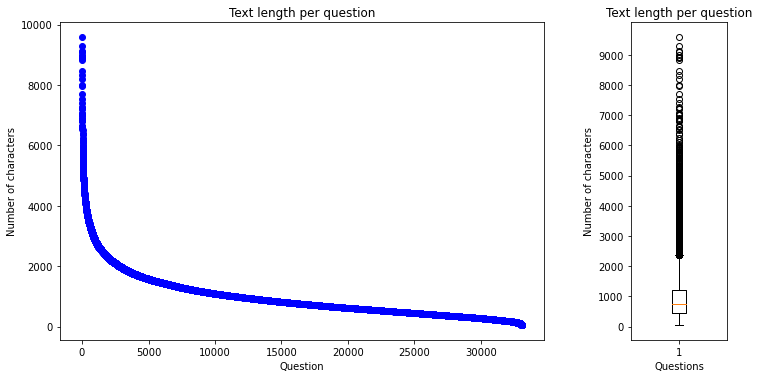

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(10,5), gridspec_kw={'width_ratios': [5, 1]})
fig.tight_layout()
plt.subplots_adjust(wspace=0.3)

x = range(0, len(text_length_per_question_sm_thousand))
y = text_length_per_question_sm_thousand
axes[0].plot(x, y, 'bo')
axes[0].set_title('Text length per question')
axes[0].set_xlabel('Question')
axes[0].set_ylabel('Number of characters')

axes[1].boxplot(text_length_per_question_sm_thousand)
axes[1].set_yticks(np.arange(0, text_length_per_question_sm_thousand[0], 1000))
axes[1].set_title('Text length per question')
axes[1].set_xlabel('Questions')
axes[1].set_ylabel('Number of characters')

plt.show()

In [73]:
print_stats(text_length_per_question)

Max:                29464               
Third Quartile:     1224.0              
Mean:               965.5370594280878   
Median:             754.0               
First Quartile:     457.0               
Min:                40                  
Standard deviation: 795.6353718727355   
Variance:           633035.6449750662   


We see that the most questions have a text length between 457 and 1224 with a *mean* of **~966** and a *median* of **754** characters.

***How often does a tag appear with other tags?*** <a id="tag_cooccurence"/>

We investigate how often tags are used alone or together with other tags.

Therefore we create a dictionary including each tag, along with the numbers it is used \[overall, alone, with one other tag, with two other tags, with three other tags, with four other tags\] 

In [74]:
tag_appearances = {}
for question in questions:
    tag_for_question = question.attrib['Tags']
    for tag in tag_for_question:
        if tag not in tag_appearances:
            tag_appearances[tag] = [0, 0, 0, 0, 0, 0]
        tag_appearances[tag][0] += 1
        tag_appearances[tag][len(tag_for_question)] += 1

In [75]:
sorted_tag_appearances = dict(sorted(tag_appearances.items(), key = lambda x: (x[1][1], x[1][2], x[1][3], x[1][4], x[1][5]), reverse=True))

After sorting the tags and their counts by their appearances we divide the counts by the overall usage of a tag.

In [76]:
normalized_sorted_tag_appearances = {}
for key in sorted_tag_appearances.keys():
    overall_count = sorted_tag_appearances[key][0]
    normalized_sorted_tag_appearances[key] = [count / overall_count for count in sorted_tag_appearances[key]]

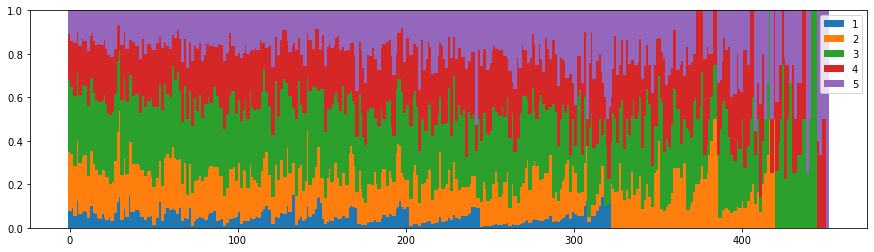

In [77]:
x = range(0, len(normalized_sorted_tag_appearances))
y1 = list(map(lambda x: normalized_sorted_tag_appearances[x][1], normalized_sorted_tag_appearances.keys()))
y2 = list(map(lambda x: normalized_sorted_tag_appearances[x][2], normalized_sorted_tag_appearances.keys()))
y3 = list(map(lambda x: normalized_sorted_tag_appearances[x][3], normalized_sorted_tag_appearances.keys()))
y3_bottom = list(map(lambda x: normalized_sorted_tag_appearances[x][1] + normalized_sorted_tag_appearances[x][2], normalized_sorted_tag_appearances.keys()))
y4 = list(map(lambda x: normalized_sorted_tag_appearances[x][4], normalized_sorted_tag_appearances.keys()))
y4_bottom = list(map(lambda x: normalized_sorted_tag_appearances[x][1] + normalized_sorted_tag_appearances[x][2] + normalized_sorted_tag_appearances[x][3], normalized_sorted_tag_appearances.keys()))
y5 = list(map(lambda x: normalized_sorted_tag_appearances[x][5], normalized_sorted_tag_appearances.keys()))
y5_bottom = list(map(lambda x: normalized_sorted_tag_appearances[x][1] + normalized_sorted_tag_appearances[x][2] + normalized_sorted_tag_appearances[x][3] + normalized_sorted_tag_appearances[x][4], normalized_sorted_tag_appearances.keys()))

bar_width = 2

fig, axes = plt.subplots(figsize=(15,4))

axes.bar(x, y1, width=bar_width, label='1')
axes.bar(x, y2, width=bar_width, bottom=y1, label='2')
axes.bar(x, y3, width=bar_width, bottom=y3_bottom, label='3')
axes.bar(x, y4, width=bar_width, bottom=y4_bottom, label='4')
axes.bar(x, y5, width=bar_width, bottom=y5_bottom, label='5')
axes.legend(loc='best')

plt.show()

We see that more than 300 tags are used alone, with 1 other tag, with 2 other tags, with 3 other tags and with 4 other tags.

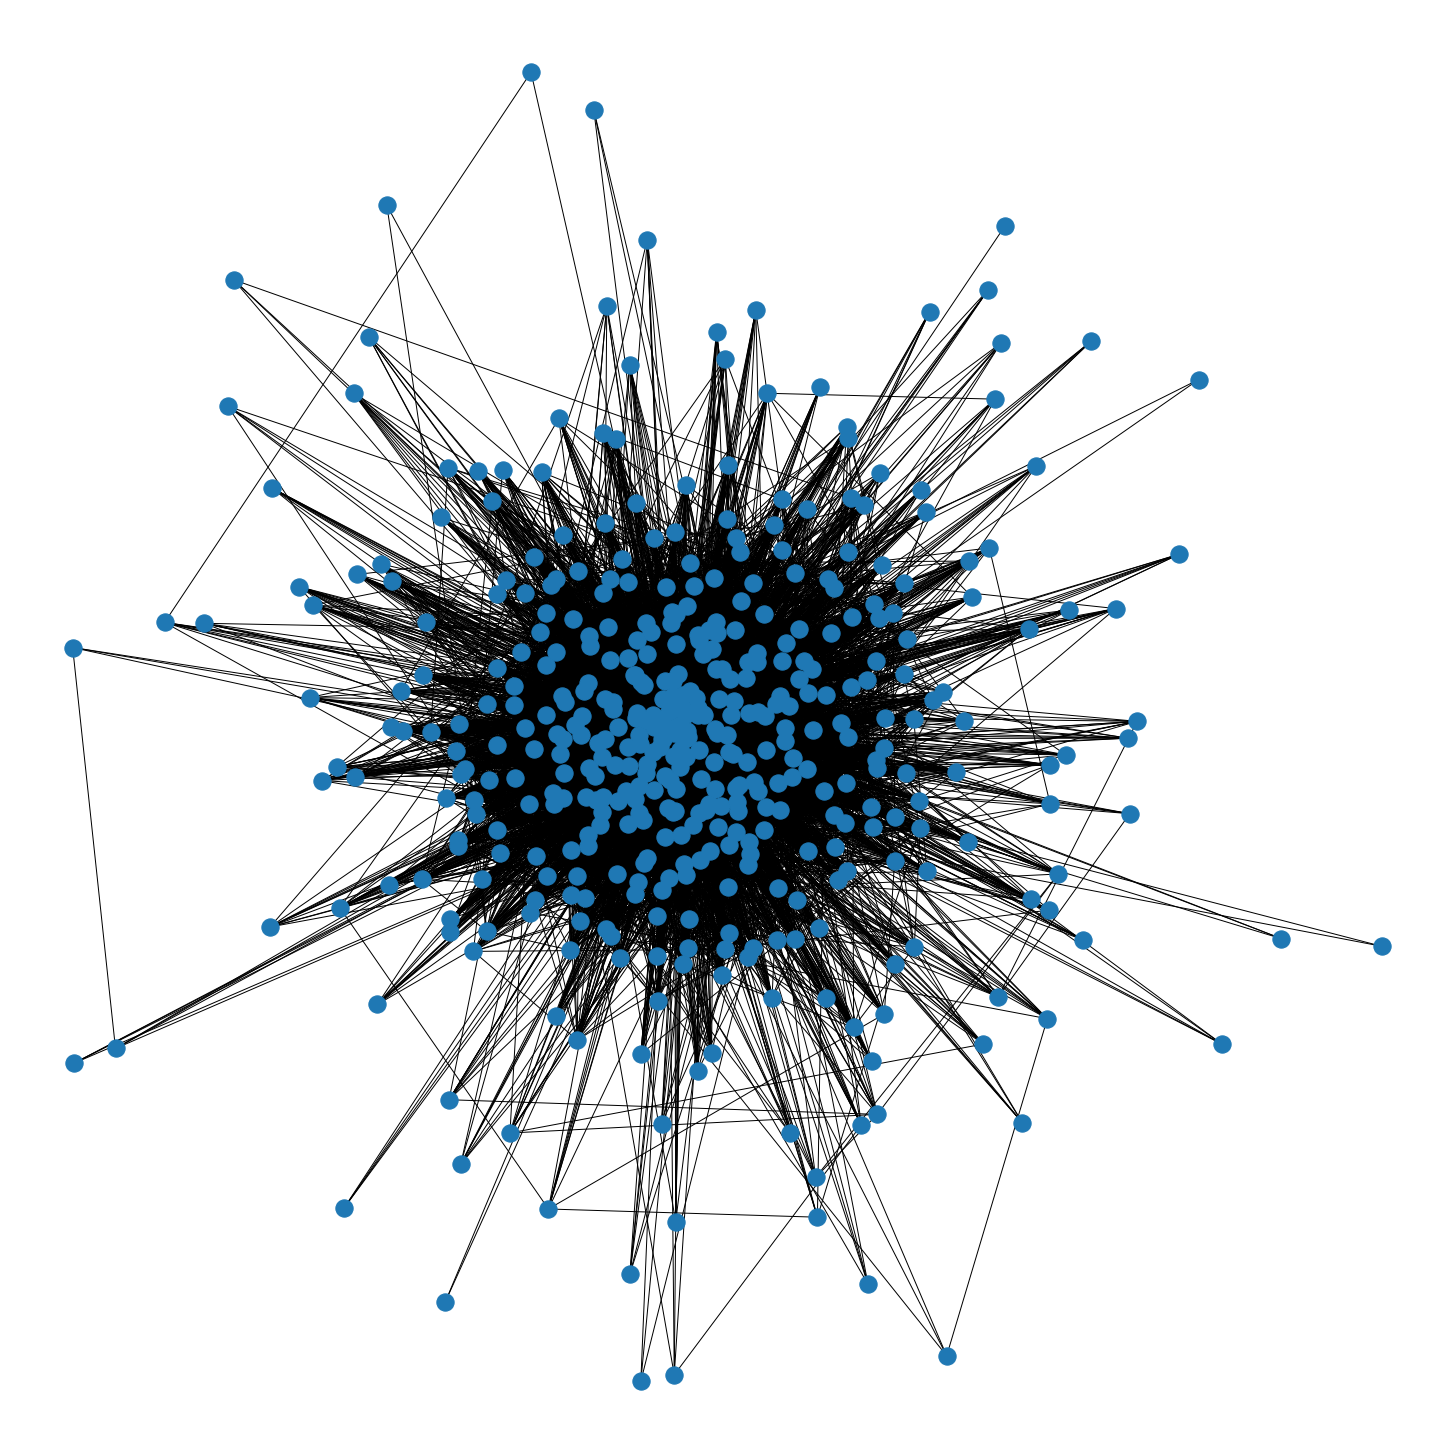

In [91]:
#Wie oft taucht ein Tag mit welchen anderen Tags auf?

import networkx as nx

G = nx.Graph()

def addTuples(array, start, end):
    for i in range(start+1, end):
        if array[start] in nx.nodes(G) and array[i] in nx.neighbors(G, array[start]):
            G[array[start]][array[i]]['weight'] += 1
        else:
            G.add_edge(array[start], array[i], weight = 1)
    if end - start > 1:
        addTuples(array, start+1, end)
for question in questions:
    tagArray = question.attrib['Tags']
    addTuples(tagArray, 0, len(tagArray))

plt.figure(figsize=(20,20))
pos = nx.spring_layout(G,k=0.21,iterations=10)
nx.draw(G, pos, )
plt.show()

In [79]:
# Zusammenhang zwischen Question und Tag(s)

In [80]:
#x = []
#y = []
#for question in questions:
#    questionId = int(question.attrib['Id'])
#    tags = question.attrib['Tags']
#    for tag in tags[0:len(tags)-1]:
#        x.append(tag)
#        y.append(questionId)

#fig, axes = plt.subplots(figsize=(20,20))

#axes.plot(y, x, 'bo')

#plt.show()

In [81]:
# Tauchen Tags im Titel und/oder Text auf?

In [82]:
#text = []
#title = []
#for question in questions:
#    questionTitle = question.attrib['Title']
#    questionText = question.attrib['Body']
#    questionTags = question.attrib['Tags']
#    for tag in questionTags:
#        title.append(tag in questionTitle)
#        text.append(tag in questionText)

#print('{:<20}{:<15}{:<15}'.format('Tags in', 'Ja', 'Nein'))
#tagInTitle = len(list(filter(lambda x: x, title))) / len(title)
#print('{:<20}{:<15.2f}{:<15.2f}'.format('Title', tagInTitle, 1 - tagInTitle))
#tagInText = len(list(filter(lambda x: x, text))) / len(text)
#print('{:<20}{:<15.2f}{:<15.2f}'.format('Text', tagInText, 1 - tagInText))
#tagInTitleAndText = len([True for i, titleVal in enumerate(title) if titleVal and text[i]]) / len(title)
#print('{:<20}{:<15.2f}{:<15.2f}'.format('Title und Text', tagInTitleAndText, 1 - tagInTitleAndText))
#tagInTitleOrText = len([True for i, titleVal in enumerate(title) if titleVal or text[i]]) / len(title)
#print('{:<20}{:<15.2f}{:<15.2f}'.format('Title oder Text', tagInTitleOrText, 1 - tagInTitleOrText))

<a id="comments"></a>

## Comments

To explore the comments we import them from the `data` module:

In [83]:
from academia_tag_recommender.data import comments as get_comments
comments = get_comments()

Importing the comments file reveals the size of the comments dataset.

In [84]:
print('There are {0} comments in the data set.'.format(len(comments)))

There are 274442 comments in the data set.


**Example:**

To understand which information is given for a specific comment we explore the attributes of an example comment.

In [85]:
print(comments[0].attrib)

{'Id': '2', 'PostId': '2', 'Score': '0', 'Text': "Do you mean in private industry or in an instructional capacity?  I suspect that these answers will vary wildly based on geographic region(s) your interested in, so it'd be nice to have that information.", 'CreationDate': '2012-02-14T21:06:14.900', 'UserId': '30', 'ContentLicense': 'CC BY-SA 3.0'}


Which results in having the following attribute keys for comments:

In [86]:
print(comments[0].keys())

['Id', 'PostId', 'Score', 'Text', 'CreationDate', 'UserId', 'ContentLicense']


<a id="votes"></a>

## Votes

To explore the comments we import them from the `data` module:

In [87]:
from academia_tag_recommender.data import votes as get_votes
votes = get_votes()

Importing the povotessts file reveals the size of the votes dataset.

In [88]:
print('There are {0} votes in the data set.'.format(len(votes)))

There are 1232032 votes in the data set.


**Example:**

To understand which information is given for a specific vote we explore the attributes of an example vote.

In [89]:
print(votes[0].attrib)

{'Id': '1', 'PostId': '6', 'VoteTypeId': '2', 'CreationDate': '2012-02-14T00:00:00.000'}


Which results in having the following attribute keys for votes:

In [90]:
print(votes[0].keys())

['Id', 'PostId', 'VoteTypeId', 'CreationDate']
